## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [2]:
# Study data files
mouse_metadata_path = "Data/Mouse_metadata.csv"
study_results_path = "Data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [3]:
# Combine the data into a single dataset
mouse_data_df = pd.merge(mouse_metadata, study_results, how = "outer", on = "Mouse ID")

# Display the data table for preview
mouse_data_df.head()
mouse_data_df.shape

(1893, 8)

In [4]:
# Checking the number of mice.
num_mice = mouse_data_df["Mouse ID"].nunique()
num_mice

249

In [5]:
mouse_data_df.dtypes

Mouse ID               object
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID.
# This shows me that mouse "g989" should be removed
dup_mouse_data = mouse_data_df[mouse_data_df.duplicated(["Mouse ID", "Timepoint"])]
dup_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Amount of rows in the DataFrame should have decreased
cleaned_mouse_data = mouse_data_df[mouse_data_df["Mouse ID"] != "g989"]
cleaned_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame
# Should be 248
number_mice = cleaned_mouse_data["Mouse ID"].nunique()
number_mice

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# First calculate each of the statistics and store them to variables
tumor_mean = cleaned_mouse_data["Tumor Volume (mm3)"].mean()
tumor_median = cleaned_mouse_data["Tumor Volume (mm3)"].median()
tumor_variance = cleaned_mouse_data["Tumor Volume (mm3)"].var()
tumor_std = cleaned_mouse_data["Tumor Volume (mm3)"].std()
tumor_sem = cleaned_mouse_data["Tumor Volume (mm3)"].sem()

In [10]:
# Generate the summary statistics table with the values that were just created
summary_stats_table = pd.DataFrame({"Mean of Tumor Volume": [tumor_mean],
                                    "Median of Tumor Volume": tumor_median,
                                    "Variance of Tumor Volume": tumor_variance,
                                    "Standard Deviation of Tumor Volume": tumor_std,
                                    "SEM of Tumor Volume": tumor_sem
                                   })

# Cleaning up the formatting for the Purchasing Analysis summary table

# Add in proper notation
summary_stats_table = summary_stats_table.style.format({    "Mean of Tumor Volume": "{:,.2f}",
                                                            "Median of Tumor Volume": "{:,.2f}",
                                                            "Variance of Tumor Volume": "{:,.2f}",
                                                            "Standard Deviation of Tumor Volume": "{:,.2f}",
                                                            "SEM of Tumor Volume": "{:,.2f}"
                                                       })
summary_stats_table

,Mean of Tumor Volume,Median of Tumor Volume,Variance of Tumor Volume,Standard Deviation of Tumor Volume,SEM of Tumor Volume
0,50.44,48.93,79.46,8.91,0.21


In [11]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
drug_groups = cleaned_mouse_data.groupby("Drug Regimen")
drug_groups

In [ ]:
# Calculate the summary values using the group just created
grouped_tumor_mean = drug_groups["Tumor Volume (mm3)"].mean()
grouped_tumor_median = drug_groups["Tumor Volume (mm3)"].median()
grouped_tumor_variance = drug_groups["Tumor Volume (mm3)"].var()
grouped_tumor_std = drug_groups["Tumor Volume (mm3)"].std()
grouped_tumor_sem = drug_groups["Tumor Volume (mm3)"].sem()

In [12]:
# Assemble the resulting series into a single summary dataframe.

# COME BACK TO THIS LATER
# MAYBE ASK IN OFFICE HOURS



In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_summary_table = pd.DataFrame({ "Mean of Tumor Volume": grouped_tumor_mean,
                                    "Median of Tumor Volume": grouped_tumor_median,
                                    "Variance of Tumor Volume": grouped_tumor_variance,
                                    "Standard Deviation of Tumor Volume": grouped_tumor_std,
                                    "SEM of Tumor Volume": grouped_tumor_sem
                                  })

# Add in proper notation
drug_summary_table = drug_summary_table.style.format({  "Mean of Tumor Volume": "{:,.2f}",
                                                        "Median of Tumor Volume": "{:,.2f}",
                                                        "Variance of Tumor Volume": "{:,.2f}",
                                                        "Standard Deviation of Tumor Volume": "{:,.2f}",
                                                        "SEM of Tumor Volume": "{:,.2f}"
                                                     })
drug_summary_table

,Mean of Tumor Volume,Median of Tumor Volume,Variance of Tumor Volume,Standard Deviation of Tumor Volume,SEM of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [14]:
# Using the aggregation method, produce the same summary statistics in a single line


# COME BACK TO THIS LATER
# MAYBE ASK IN OFFICE HOURS



## Bar and Pie Charts

StopIteration: 

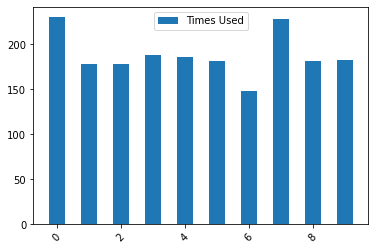

In [39]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_counts = drug_groups["Mouse ID"].count()
drug_counts

# Give the data frames the values and proper labels using the pandas functionality
pandas_regimen_data = pd.DataFrame({"Drug Regimen": drug_groups, "Times Used": drug_counts})

# Create the chart using the pandas functionality
pandas_regimen_barchart = pandas_regimen_data.plot.bar(x= "Drug Regimen", y= "Times Used", rot=45)
pandas_regimen_barchart

In [16]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.



In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [20]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [21]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [22]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [23]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [24]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
